<a href="https://colab.research.google.com/github/soundarzozm/MNIST-Keras-model/blob/master/mnist1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test_orig.shape)
print(y_test_orig.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


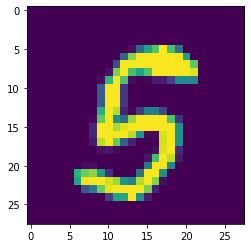

In [0]:
plt.imshow(X_train_orig[1298])

In [0]:
X_train = X_train_orig.reshape(60000,28,28,1)
X_test = X_test_orig.reshape(10000,28,28,1)

In [0]:
y_train = to_categorical(y_train_orig)
y_test = to_categorical(y_test_orig)

In [0]:
print(y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))

model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=512)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 10s 165us/step - loss: 1.4910 - accuracy: 0.8896 - val_loss: 0.0865 - val_accuracy: 0.9743
Epoch 2/2
60000/60000 [==============================] - 3s 45us/step - loss: 0.0625 - accuracy: 0.9809 - val_loss: 0.0701 - val_accuracy: 0.9790


In [0]:
pred = model.predict(X_test)

In [0]:
result = []

for i in range(pred.shape[0]):
  max1=0.0
  pos=0
  for j in range(pred.shape[1]):
    if pred[i][j] > max1:
      max1 = pred[i][j]
      pos = j
  result.append(pos)    

In [0]:
print(result)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 8, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 2, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [0]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 61us/step


[0.07005447605038062, 0.9789999723434448]

1


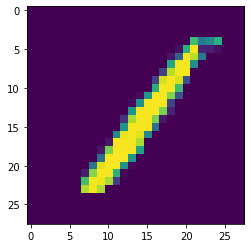

In [0]:
print(result[7463])
plt.imshow(X_test_orig[7463])